In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from sklearn.neighbors import KNeighborsClassifier 

In [7]:
from sklearn.model_selection import train_test_split

In [25]:
data = pd.read_csv(r"C:\Users\athar\Desktop\EAI FundamentalAI\diabetes.csv")

In [26]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
## DATA CLEANING

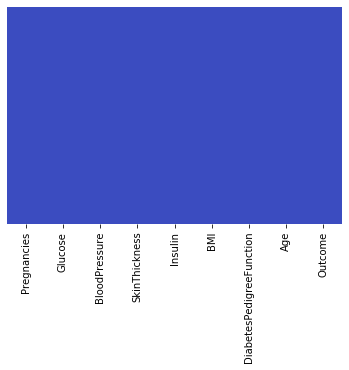

In [28]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

### KNN

### importing 


In [31]:
X = data.drop('Outcome', axis = 1)

In [32]:
Y = data['Outcome']

In [33]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [34]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [37]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [39]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
pred_KNN = KNN.predict(X_test)

In [60]:
print(confusion_matrix(Y_test,pred_KNN))
print(classification_report(Y_test,pred_KNN))

[[127  23]
 [ 47  57]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       150
           1       0.71      0.55      0.62       104

    accuracy                           0.72       254
   macro avg       0.72      0.70      0.70       254
weighted avg       0.72      0.72      0.72       254



### understasnding standard example


In [62]:
%matplotlib inline

In [64]:
i = sns.load_dataset('iris')

In [66]:
i.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
i.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [73]:
i.columns.unique()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [75]:
X = i.drop('species', axis = 1)

In [76]:
y = i['species']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [79]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [80]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [81]:
prediction_KNN = KNN.predict(X_test)

In [82]:
print(confusion_matrix(y_test,prediction_KNN))
print(classification_report(y_test,prediction_KNN))

[[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [83]:
error = []

for i in range(1,50):
    KNN_i=KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train,y_train)
    pred_i = KNN_i.predict(X_test)
    
    error.append(np.mean(y_test != pred_i))

### Trying to plot

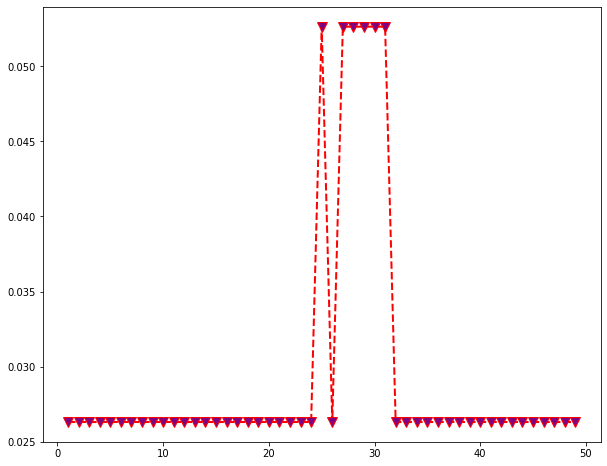

In [84]:
##have to use Standardscaler 
plt.figure(figsize=(10,8))
plt.plot(range(1,50),error, ls='--',color= 'red',lw=2, marker = 'v', markerfacecolor = 'purple',markersize=10)
plt.xlabel = ('range')
plt.ylabel = ('error rate')
plt.title = (' range vs error rate')